### Butler Volmer Explicit Equations error
This brief study will show which explicit model for BV equation for Vactivation calculation is the closest to the actual BV. 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

In [24]:
import BV

In [25]:
BV

<module 'BV' from '/Users/Peter/Desktop/fc_2021/NGFC-Lib/jupyter/Python_IV_Curve/2_IV_Model_Update/Match_Experimental_Data/BV.py'>

In [ ]:
#BV Summary:
#Function inputs for all functions: 
#def IV_new_2(oT,fT,J,pO2air,pN2air,pH2,pH2O,pCO,pCO2,pCH4,pN2,pSys,
#             BV_alpha, BV_prexp, BV_Eact,V_loss=0.0, R_cont=0.0, 
#             DsurfH2th1=0.1, DsurfH2th2=4.51e-5,Fkn=True, d0_am=0.28,d0_cm=0.28, th_e=10)

In [2]:
J=np.linspace(0,0.7,1000)

# environment parameters
R=8.314
F=96485.0

oT =700+273.15      #Temperature oxidant (K)
fT =700+273.15      #Temperature fuel (K)
Tk=(oT+fT)/2.0
Tc=Tk-273.0

[0.00000000e+00 1.79867054e-08 3.59734108e-08 5.39601163e-08
 7.19468217e-08 8.99335272e-08 1.07920233e-07 1.25906938e-07
 1.43893643e-07 1.61880349e-07 1.79867054e-07 1.97853760e-07
 2.15840465e-07 2.33827171e-07 2.51813876e-07 2.69800581e-07
 2.87787287e-07 3.05773992e-07 3.23760698e-07 3.41747403e-07
 3.59734109e-07 3.77720814e-07 3.95707519e-07 4.13694225e-07
 4.31680930e-07 4.49667636e-07 4.67654341e-07 4.85641047e-07
 5.03627752e-07 5.21614458e-07 5.39601163e-07 5.57587868e-07
 5.75574574e-07 5.93561279e-07 6.11547985e-07 6.29534690e-07
 6.47521396e-07 6.65508101e-07 6.83494806e-07 7.01481512e-07
 7.19468217e-07 7.37454923e-07 7.55441628e-07 7.73428334e-07
 7.91415039e-07 8.09401744e-07 8.27388450e-07 8.45375155e-07
 8.63361861e-07 8.81348566e-07 8.99335272e-07 9.17321977e-07
 9.35308682e-07 9.53295388e-07 9.71282093e-07 9.89268799e-07
 1.00725550e-06 1.02524221e-06 1.04322891e-06 1.06121562e-06
 1.07920233e-06 1.09718903e-06 1.11517574e-06 1.13316244e-06
 1.15114915e-06 1.169135

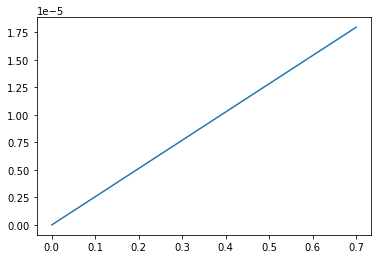

In [12]:
#PNNL Original Model
BV_prexp=9.6620275
BV_Eact=3.35955954
BV_alpha=0.48646415
i0=BV_prexp*math.exp(-BV_Eact)
BV=np.zeros(len(J))

for i in range(len(J)):
    BV[i]=(R*Tk/BV_alpha/F)*math.log((J[i]/2.0/(i0*10000))+math.sqrt((J[i]/2.0/(i0*10000))**2+1))

print(BV)

plt.plot(J,BV)

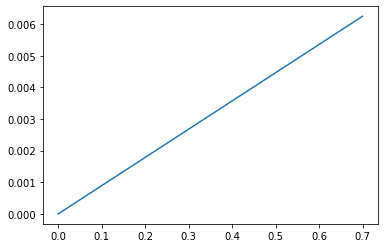

In [13]:
#Same as PNNL original model in hyperbolic #perform speed testing on the calculation
i0=BV_prexp*math.exp(-BV_Eact/R/Tk)

BV=np.zeros(len(J))

for i in range(len(J)):
    BV[i]=(R*Tk/BV_alpha/F)*math.asinh(J[i]/2/i0)
    
plt.plot(J,BV)

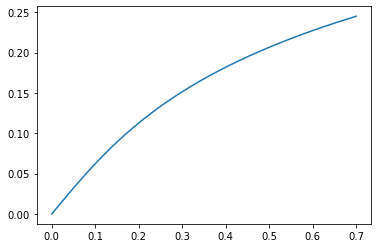

In [17]:
#Hyperbolic sine equation. Meng.et
Eact_a = 1e5
BV_alpha=7.00000000e-01
Prex_A=1.08110742e+00
Prex_C=2.36148376e+02
pH2= 0.97
pH2O= 0.03
pSys= 1
Keq_dHo=-56930.0
Keq_A=6.75
Keq_B=-0.64
Keq_C=-0.08
Keq_L=-8.74
Keq_dG=Keq_dHo+Keq_A*Tk*math.log10(Tk)+Keq_B*Tk*Tk/1000+Keq_C*100000/Tk+Keq_L*Tk
Kequib=math.exp(-Keq_dG*4.184/R/Tk)
pO2anode=(pH2O/Kequib/pH2)**2

i0a=Prex_A*1e10*((pH2*pH2O)/pSys**2)*math.exp(-Eact_a/R/Tk) #prex_a = 1.344 (e10)
#i0=BV_prexp*math.exp(-BV_Eact/R/Tk)
Eact_c = 1.2e5
i0c=Prex_C*1e9*(pO2anode/pSys)**(0.25)*math.exp(-Eact_c/R/Tk) #prex_c = 2.051 (e9)

for i in range(len(J)):
    Vact_a=(R*Tk/BV_alpha/F)*math.asinh(J[i]/2/i0a)
    Vact_c=(R*Tk/BV_alpha/F)*math.asinh(J[i]/2/i0c)
    BV[i]=Vact_a+Vact_c
plt.plot(J,BV)

In [ ]:
#second expansion
i0=BV_prexp*math.exp(-BV_Eact/R/Tk)
#BV=(R*Tk/BV_alpha/F)*math.asinh(J/2/i0)
#Using quadratic formula derived from 2nd order taylor expansion.
AA=(F/R/Tk)**2*(-2*BV_alpha+1)*0.5
BB= F/R/Tk
CC=-J/i0
#explicit Vact from 2nd order Taylor expansion
BV=(-BB+math.sqrt((BB**2)-4*AA*CC))/(2*AA)

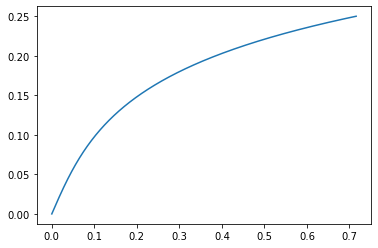

In [21]:
#Original BV equation ranging Vact from 0 to 0.25
#PNNL Original Model
BV_prexp=9.6620275/10
BV_Eact=3.35955954
BV_alpha=0.48646415
i0=BV_prexp*math.exp(-BV_Eact)
Vact = np.linspace(0,0.25,1000)
J=np.zeros(len(Vact))

for i in range(len(J)):
    J[i]=-i0*(math.exp(-BV_alpha*2*Vact[i]*F/R/Tk)-math.exp((1-BV_alpha)*Vact[i]*2*F/R/Tk))

plt.plot(J,Vact)

In [ ]:
#second expansion+tafel\]

i0=BV_prexp*math.exp(-BV_Eact/R/Tk)
if J/i0 < 4:
#BV=(R*Tk/BV_alpha/F)*math.asinh(J/2/i0)
#Using quadratic formula derived from 2nd order taylor expansion.
    AA=(F/R/Tk)**2*(-2*BV_alpha+1)*0.5
    BB= F/R/Tk
    CC=-J/i0
    #explicit Vact from 2nd order Taylor expansion
    BV=(-BB+math.sqrt((BB**2)-4*AA*CC))/(2*AA)